# Bhatia Lab peptide analysis
## Carmen Martin
### 8/31/21


## Goals:
- Generate kmers for all existing peptide sequences and do blast to find overlapping kmers in the peptide library
- Calculate pairwise distances between peptides in the library
- Use modlamp to plot intertesting stats of aa distribution

In [1]:
#Import packages
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.stats import zscore
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import scipy.stats as ss
import csv

In [2]:
# Import excel file containing all natural sequences from the lab with a single name
path_seq = 'One_name_peptide_only_sequence_natural.xlsx'
#path_rv = 'Revitope_peptides.xlsx' # toggle between these two paths to include linkers or not
path_rv = 'Revitope_cleavage_site.xlsx'


data_bhatia = pd.read_excel(path_seq, header=0, index_col=0)
data_rv = pd.read_excel(path_rv, header=0, index_col=0)

# Extract the names of the revitope peptides
rev_pep = data_rv.index.to_list()
print(rev_pep)

# Make dataframe with all peptides
data = pd.concat([data_bhatia, data_rv])

data

['RV1', 'RV2', 'RV3', 'RV4', 'RV5', 'RV6', 'RV7', 'RV8', 'RV9', 'RV10', 'RV11', 'RV12', 'RV13', 'RV14', 'RV15', 'RV16', 'RV17', 'RV18', 'RV19', 'RV20', 'RV21', 'RV22', 'RV23', 'RV24', 'RV25', 'RV26', 'RV27', 'RV28', 'RV29', 'RV30', 'RV31', 'RV32', 'RV33', 'RV34', 'RV35', 'RV36', 'RV37', 'RV38', 'RV39', 'RV40', 'RV41', 'RV42', 'RV43', 'RV44', 'RV45', 'RV46', 'RV47']


,Sequence
Name,
LQ1,GRQRRVVGG
LQ2,GRQARAVGG
LQ3,GRRARVVGG
Q6,GPLGLRSWG
LQ5,GWEAVRSAMWG
...,...
RV43,NLYRVGLAQAVR
RV44,KPAKFFRLAFRA
RV45,ENLYFQG


In [3]:
# # Test kmer generation for first sequence for k=4
# k=5  # set k
# temp_key = data.index.to_list()[0]   # assign peptide names to keyspull corresponding sequence
# temp_sec = data['Sequence'].loc[temp_key]
# print(temp_key)
# print(temp_seq)

# n=len(temp_seq)-k+1
# temp_kmer = []
# # for i in np.arange(n):
#   #  temp_kmer.append(temp_seq[i:i+k])

# for i in np.arange(n): temp_kmer.append(temp_seq[i:i+k])
# print(temp_kmer)

In [4]:
# kmer_dict = {}  #create empy dictionary, keys will be the name of the peptide and the values will be the kmers
# keys = data.index.to_list()[:4]  #pull first 4 peptides as a trial
# k = 5  #set k=5 to start
# for i in keys:
#     temp_seq = data['Sequence'].loc[i]
#     n=len(temp_seq)-k+1
#     temp_kmer = []
#     for j in np.arange(n): temp_kmer.append(temp_seq[j:j+k])
#     #print(i)
#     #print(temp_seq)
#     kmer_dict[i] = temp_kmer
# print(kmer_dict)
    

In [5]:
# Function to generate kmers of different sizes
def generate_kmers(keys_list, values_list, k):
    kmer_dict = {}  #create empy dictionary, keys will be the name of the peptide and the values will be the kmers
    for i in np.arange(len(keys_list)):
        temp_seq = values_list[i]
        #print(temp_seq)
        #print(len(temp_seq))
        n=len(temp_seq)-k+1
        #print(n)
        temp_kmer = []
        for j in np.arange(n): temp_kmer.append(temp_seq[j:j+k])
        kmer_dict[keys_list[i]] = temp_kmer
        
    return kmer_dict
    

In [6]:
# define keys and values to run genrate_kmer function with bhatia peptides
keys = data.index.to_list()
values = data['Sequence'].to_list()

kmer_3=generate_kmers(keys, values, k=3)
kmer_4=generate_kmers(keys, values, k=4)
kmer_5=generate_kmers(keys, values, k=5)
kmer_6=generate_kmers(keys, values, k=6)

#print('Str1:', values[0])
#print('Str2:', values[1])
#print(kmer_5)

In [7]:
# function to find overlapping kmers
def find_overlapping_kmers(kmer_dict):
    # find unique kmers in dictionary
    unique = list(sorted({ele for val in kmer_dict.values() for ele in val}))
    print('Number of unique kmers is:', len(unique))
    
    # create new dictionary that will store peptides with overlapping kmers
    overlap_dict = {}  
    overlap_keys = unique
    for i in overlap_keys:
        overlap_dict[i] = []
        
    for el in unique:
        for key in kmer_dict.keys(): 
            #print('key:', key)
            if el in kmer_dict[key]:
                #print('kmer_4[key]:', kmer_3[key])
                #print(el+' in '+ key)
                overlap_dict[el].append(key)
            #else:
             #   print('no overlap')
            #print(overlap_dict)
    
    return overlap_dict

In [8]:
# find overlap of kmers of different lengths between bhatia lab and revitope

overlap = find_overlapping_kmers(kmer_4)
print(overlap)

with open('kmer_4_no_linker.csv', 'w') as f:
    for key in overlap.keys():
        f.write("%s,%s\n"%(key,overlap[key]))
        
        

Number of unique kmers is: 908
{'AAAT': ['SQ12', 'TQ22'], 'AAEA': ['SQ1', 'SQ27', 'TQ11', 'TQ37'], 'AAFA': ['LQ78', 'BV17'], 'AAFR': ['LQ6'], 'AAKG': ['LQ36'], 'AALI': ['FX18', 'FX16'], 'AANL': ['LQ14', 'PQ14', 'RV12'], 'AATL': ['RV15'], 'AATQ': ['SQ12', 'TQ22'], 'AATR': ['RV25'], 'ADEP': ['RV20'], 'AEAI': ['SQ1', 'SQ27', 'TQ11', 'TQ37'], 'AELR': ['LQ15', 'RV13'], 'AELV': ['RV11'], 'AEQQ': ['LQ74', 'LQ75'], 'AFAG': ['LQ78', 'BV17'], 'AFRA': ['RV44'], 'AFRF': ['LQ6'], 'AFRR': ['PQ10', 'TQ47'], 'AFRS': ['PQ16', 'RV23'], 'AGAG': ['LQ7'], 'AGGA': ['TQ12', 'SQ2'], 'AGIL': ['SQ16', 'TQ26'], 'AGLV': ['SQ22', 'TQ32'], 'AGLY': ['RV41'], 'AGPR': ['LQ36'], 'AGgG': ['LQ48'], 'AIEF': ['LQ77', 'BV01'], 'AISD': ['SQ1', 'TQ11'], 'AKFF': ['RV19', 'RV44'], 'AKIR': ['LQ37', 'LQ38'], 'AKKG': ['LQ37'], 'ALEE': ['RV14'], 'ALEK': ['PQ1', 'TQ38'], 'ALGL': ['RV8'], 'ALIT': ['FX16'], 'ALIV': ['FX18'], 'ALKQ': ['BV11'], 'ALLR': ['LQ70'], 'ALNV': ['SQ3', 'TQ13'], 'ALVP': ['LQ16'], 'ALWA': ['LQ13'], 'ALWE': ['PX11

In [9]:
# # calculate pairwise string similarity using partial ratio levenstein similarity
# from fuzzywuzzy import fuzz

# Str1 = data['Sequence'][0]+'G'
# Str2 = data['Sequence'][1]

# # Select 2 sample peptide sequences
# print(Str1)
# print(Str2)

# # Calculate Levenshtein distance (Ratio) as well as a modified Levenshtein distance that ignores differences in length
# Ratio = fuzz.ratio(Str1.lower(),Str2.lower())
# Partial_Ratio = fuzz.partial_ratio(Str1.lower(),Str2.lower())

# print(Ratio)
# print(Partial_Ratio)

In [9]:
def similarity(str1, str2):
    from fuzzywuzzy import fuzz
    # Calculate Levenshtein distance (Ratio) as well as a modified Levenshtein distance that ignores differences in length
    ratio = fuzz.ratio(str1.lower(),str2.lower())
    partial_ratio = fuzz.partial_ratio(str1.lower(),str2.lower())
    
    return ratio, partial_ratio

Str1 = data['Sequence'][0]+'G'
Str2 = data['Sequence'][1]

[rat, par_rat] = similarity(Str1, Str2)
print(rat)
print(par_rat)

74
78


/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [10]:
def similarity_matrix(mat):
    rows = mat.index.to_list()
    cols = mat.index.to_list()
    sim_m = pd.DataFrame(index=rows, columns=cols)
    sim_par_m = pd.DataFrame(index=rows, columns=cols)

    j=0
    for j in np.arange(len(rows)):
        for i in np.arange(len(rows)):
            Str1 = mat['Sequence'].loc[rows[j]]
            Str2 = mat['Sequence'].loc[rows[i]]
            sim_m.iloc[j,i] = similarity(Str1, Str2)[0]
            sim_par_m.iloc[j,i] = similarity(Str1, Str2)[1]
            
        j=j+1
        
    return sim_m, sim_par_m


In [11]:
# Calculate pairwise similarity between strings using the simple levenshtein distance and the partial levenshtein distance
mat, par_mat = similarity_matrix(data)
display(mat)

# Save similairty matrices to csv
#mat.to_csv('levenschtein_no_linkers.csv')
#par_mat.to_csv('partial_levenschtein_no_linkers.csv')

,LQ1,LQ2,LQ3,Q6,LQ5,LQ6,LQ7,PX06,TQ51,LQ10,...,RV38,RV39,RV40,RV41,RV42,RV43,RV44,RV45,RV46,RV47
LQ1,100,78,89,33,30,40,40,47,38,20,...,14,20,20,33,20,29,19,12,21,31
LQ2,78,100,78,33,40,50,50,47,38,30,...,29,20,40,33,30,38,38,12,21,31
LQ3,89,78,100,33,40,40,50,47,38,30,...,14,20,30,44,30,29,29,12,21,31
Q6,33,33,33,100,50,20,40,71,88,30,...,14,40,60,44,30,38,29,12,42,31
LQ5,30,40,40,50,100,64,45,32,33,27,...,25,27,36,30,36,35,26,11,19,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RV43,29,29,29,38,35,26,26,40,42,17,...,47,43,43,38,17,100,33,42,18,12
RV44,19,29,29,19,26,43,35,30,21,17,...,35,17,26,29,52,33,100,11,9,12
RV45,25,25,12,25,22,33,22,40,29,22,...,33,33,11,25,33,42,21,100,12,36
RV46,21,21,21,32,19,19,38,33,35,19,...,13,29,38,21,29,18,9,12,100,14


/Users/mariaalonso/opt/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


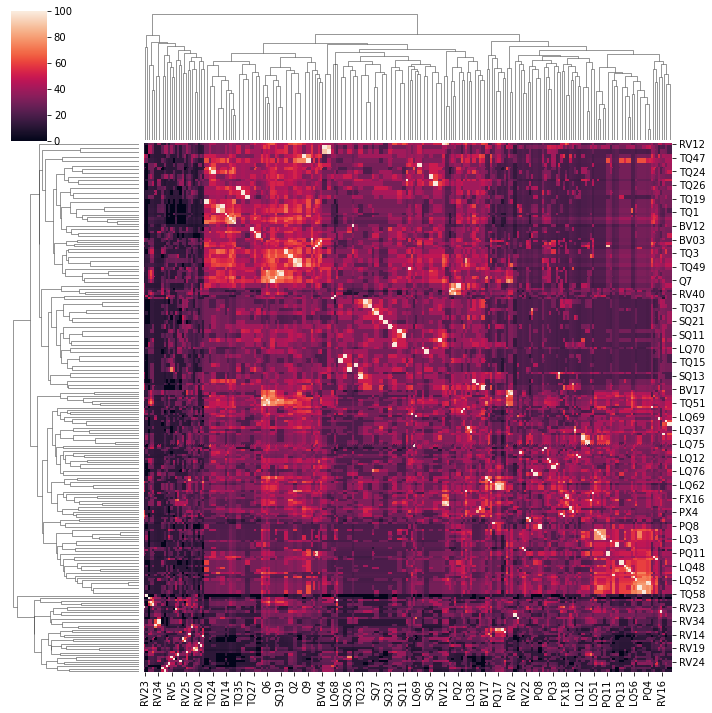

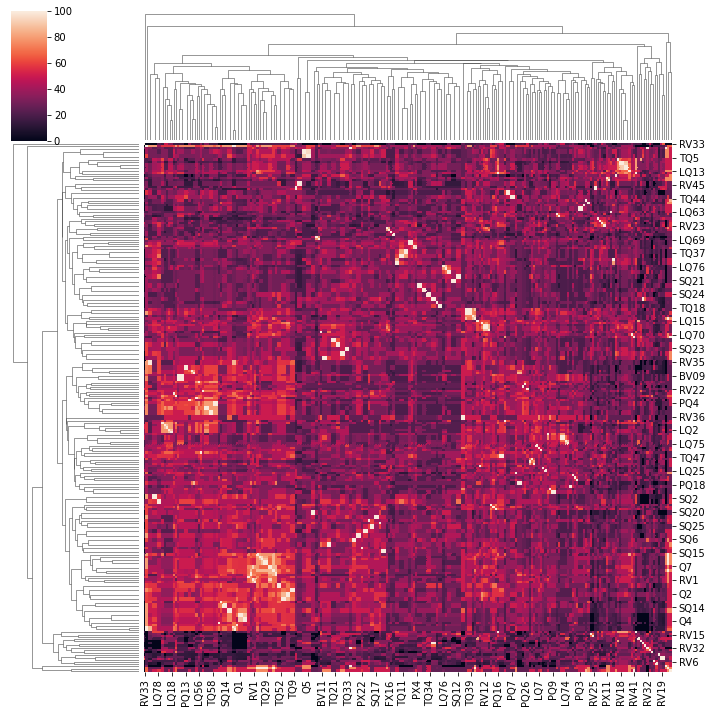

In [12]:
# Plot clustermap of similarity scores
mat = mat.astype(float)
par_mat = par_mat.astype(float)

cluster_grid_mat = sns.clustermap(mat)

cluster_grid_par_mat = sns.clustermap(par_mat)

47


,LQ1,LQ2,LQ3,Q6,LQ5,LQ6,LQ7,PX06,TQ51,LQ10,...,BV04,BV05,BV09,BV10,BV11,BV12,BV14,BV15,BV17,BV18
RV1,38.0,38.0,38.0,62.0,50.0,25.0,50.0,67.0,71.0,25.0,...,25.0,38.0,46.0,38.0,38.0,27.0,43.0,31.0,46.0,31.0
RV2,40.0,43.0,40.0,62.0,50.0,25.0,50.0,67.0,71.0,25.0,...,25.0,50.0,62.0,38.0,38.0,25.0,38.0,25.0,60.0,40.0
RV3,0.0,0.0,0.0,75.0,0.0,0.0,25.0,50.0,75.0,25.0,...,25.0,50.0,25.0,29.0,50.0,25.0,25.0,25.0,0.0,33.0
RV4,17.0,17.0,17.0,33.0,17.0,33.0,33.0,33.0,33.0,44.0,...,17.0,17.0,17.0,17.0,17.0,17.0,33.0,36.0,33.0,50.0
RV5,33.0,17.0,33.0,22.0,18.0,20.0,0.0,33.0,17.0,22.0,...,36.0,17.0,36.0,36.0,17.0,17.0,0.0,33.0,0.0,0.0
RV6,17.0,17.0,17.0,33.0,33.0,36.0,33.0,33.0,17.0,33.0,...,40.0,0.0,17.0,50.0,17.0,33.0,17.0,36.0,17.0,25.0
RV7,17.0,17.0,17.0,17.0,33.0,0.0,0.0,33.0,17.0,44.0,...,17.0,18.0,17.0,18.0,22.0,17.0,17.0,50.0,0.0,0.0
RV8,43.0,57.0,50.0,50.0,43.0,40.0,57.0,38.0,57.0,27.0,...,38.0,38.0,53.0,46.0,50.0,25.0,38.0,50.0,36.0,55.0
RV9,25.0,25.0,25.0,100.0,25.0,25.0,25.0,75.0,100.0,29.0,...,50.0,50.0,50.0,57.0,29.0,29.0,50.0,50.0,25.0,67.0
RV10,25.0,50.0,25.0,75.0,50.0,57.0,50.0,50.0,75.0,29.0,...,50.0,50.0,25.0,50.0,29.0,25.0,50.0,50.0,57.0,67.0


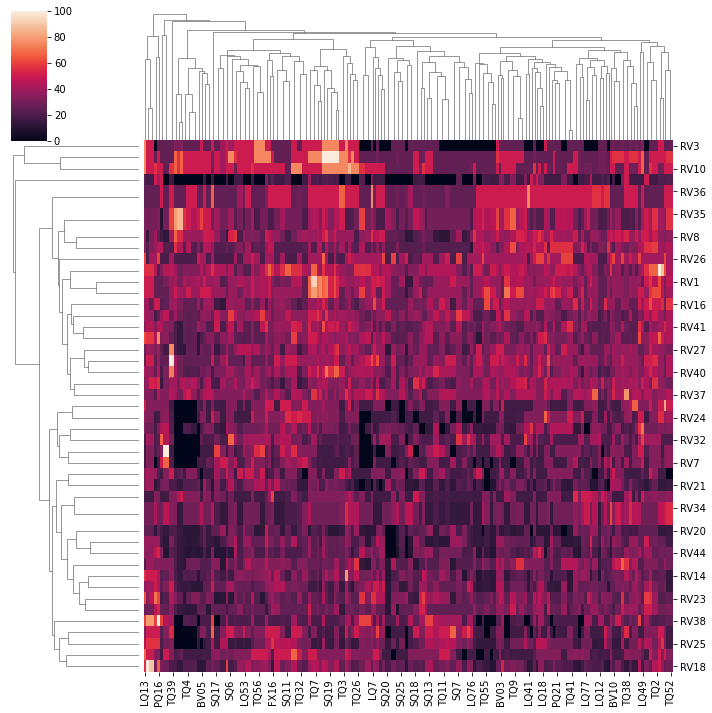

In [14]:
# Try to access dendrogram of partial distance
rev_num = len(rev_pep)
print(rev_num)
par_mat_rv = par_mat.iloc[-rev_num:,:-rev_num]

display(par_mat_rv)
par_mat_rv.to_csv('partial_levenschtein_distance_no_linkers_rev_bhatia.csv')

par_mat_rv = par_mat_rv.astype(float)

cluster_grid_mat = sns.clustermap(par_mat_rv)


38.0
8742


Text(0, 0.5, 'Frequency')

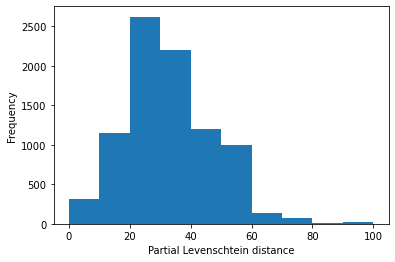

In [20]:
# Make histogram of similairyt scores
sim_all = np.concatenate(par_mat_rv.values)
#plt.hist(sim_all)
print(sim_all[0])
print(len(sim_all))

plt.hist(sim_all)
plt.xlabel('Partial Levenschtein distance')
plt.ylabel('Frequency')

In [35]:
par_mat_rv.shape


(47, 186)

In [56]:
num_row = len(par_mat_rv.index)
print(len(par_mat_rv.index))

num_col = len(par_mat_rv.columns)
print(len(par_mat_rv.columns))

pair_sim = pd.DataFrame(columns = ['Peptide 1', 'Sequence 1', 'Peptide 2', 'Sequence 2' ,'Similarity'], index=np.arange(47*186))

display(pair_sim)
n=0
for i in np.arange(num_row):
    for j in np.arange(num_col):
        pep1=par_mat_rv.index[i]
        pair_sim.iloc[n,0] = pep1
        pair_sim.iloc[n,1] = data['Sequence'].loc[pep1]
        pep2=par_mat_rv.columns[j]
        pair_sim.iloc[n,2]=pep2
        pair_sim.iloc[n,3] = data['Sequence'].loc[pep2]
        pair_sim.iloc[n,4] = par_mat_rv.iloc[i,j]
        n=n+1

display(pair_sim)       
        
    
    


47
186


,Peptide 1,Sequence 1,Peptide 2,Sequence 2,Similarity
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8737,NaN,NaN,NaN,NaN,NaN
8738,NaN,NaN,NaN,NaN,NaN
8739,NaN,NaN,NaN,NaN,NaN
8740,NaN,NaN,NaN,NaN,NaN


,Peptide 1,Sequence 1,Peptide 2,Sequence 2,Similarity
0,RV1,PLGVRGKA,LQ1,GRQRRVVGG,38
1,RV1,PLGVRGKA,LQ2,GRQARAVGG,38
2,RV1,PLGVRGKA,LQ3,GRRARVVGG,38
3,RV1,PLGVRGKA,Q6,GPLGLRSWG,62
4,RV1,PLGVRGKA,LQ5,GWEAVRSAMWG,50
...,...,...,...,...,...
8737,RV47,IEGR,BV12,GGHMVQHLIQWHG,29
8738,RV47,IEGR,BV14,GGTGPPGYTG,25
8739,RV47,IEGR,BV15,GGTGLPVYQG,25
8740,RV47,IEGR,BV17,GGAAFAG,25


In [58]:
# make new columns with combined name, remove duplicates and sort by similarity
pair_sim['Peptide pair']=pair_sim['Peptide 1']+'-'+pair_sim['Peptide 2']
# pair_sim2=pair_sim.drop_duplicates(subset=['Peptide pair'])
pair_sim_sorted = pair_sim.sort_values(by=['Similarity'], ascending=False)
pair_sim_sorted.to_csv('sorted_pairwise_partial_levenschtein_distance_no_linkers_rev_bhatia.csv')

pair_sim_sorted                                  

,Peptide 1,Sequence 1,Peptide 2,Sequence 2,Similarity,Peptide pair
6909,RV38,LAQAF,PQ16,GLAQAFRSG,100,RV38-PQ16
1550,RV9,PLGL,LQ64,GGGPLGLARG,100,RV9-LQ64
5041,RV28,GSGRSANA,PQ2,GGGSGRSANAKG,100,RV28-PQ2
1491,RV9,PLGL,Q6,GPLGLRSWG,100,RV9-Q6
1496,RV9,PLGL,TQ51,GPLGLRG,100,RV9-TQ51
...,...,...,...,...,...,...
4452,RV24,NLYRVE,BV02,GGHPGGPQG,0,RV24-BV02
4462,RV24,NLYRVE,BV17,GGAAFAG,0,RV24-BV17
6008,RV33,FRFRFR,TQ24,GGLGPKGQTG,0,RV33-TQ24
6009,RV33,FRFRFR,TQ12,GGAGGAQMGA,0,RV33-TQ12


In [50]:
data['Sequence'].loc['LQ1']
pair_sim_sorted['Peptide 1'].loc[0]
par_mat_rv.index[0]
data['Sequence'].loc[par_mat_rv.index[0]]

'PLGVRGKA'

In [90]:
# Try to access dendrogram of partial distance
cluster_grid_par_mat.dendrogram_col.reordered_ind

[218,
 159,
 220,
 231,
 57,
 87,
 76,
 184,
 18,
 0,
 2,
 1,
 17,
 31,
 47,
 178,
 30,
 164,
 83,
 166,
 46,
 44,
 45,
 53,
 54,
 23,
 50,
 21,
 170,
 120,
 171,
 22,
 158,
 182,
 177,
 56,
 82,
 78,
 126,
 64,
 185,
 174,
 77,
 124,
 127,
 172,
 7,
 121,
 186,
 187,
 62,
 3,
 129,
 103,
 146,
 80,
 130,
 8,
 84,
 117,
 167,
 20,
 165,
 16,
 125,
 81,
 131,
 189,
 219,
 230,
 26,
 169,
 79,
 128,
 104,
 147,
 65,
 67,
 180,
 106,
 149,
 100,
 143,
 96,
 140,
 95,
 139,
 88,
 133,
 107,
 150,
 224,
 91,
 135,
 102,
 145,
 42,
 94,
 138,
 179,
 109,
 152,
 101,
 144,
 183,
 59,
 99,
 41,
 48,
 9,
 11,
 98,
 142,
 86,
 132,
 111,
 154,
 75,
 173,
 32,
 85,
 58,
 89,
 90,
 134,
 108,
 151,
 110,
 153,
 181,
 93,
 137,
 74,
 71,
 92,
 136,
 105,
 148,
 97,
 141,
 221,
 232,
 213,
 19,
 156,
 212,
 225,
 14,
 201,
 15,
 197,
 13,
 116,
 175,
 70,
 176,
 27,
 115,
 163,
 211,
 113,
 161,
 112,
 160,
 193,
 63,
 119,
 122,
 123,
 207,
 35,
 34,
 36,
 37,
 6,
 43,
 10,
 24,
 222,
 39,
 114,
 1

In [51]:
small = mat.iloc[0:5, 0:5]
display(small)

,LQ1,LQ2,LQ3,Q6,LQ5
LQ1,100,78,89,33,30
LQ2,78,100,78,33,40
LQ3,89,78,100,33,40
Q6,33,33,33,100,50
LQ5,30,40,40,50,100


In [60]:
# print(type(small.iloc[0,0]))
# print(small.iloc[0,0])
small_float = small.astype(float)

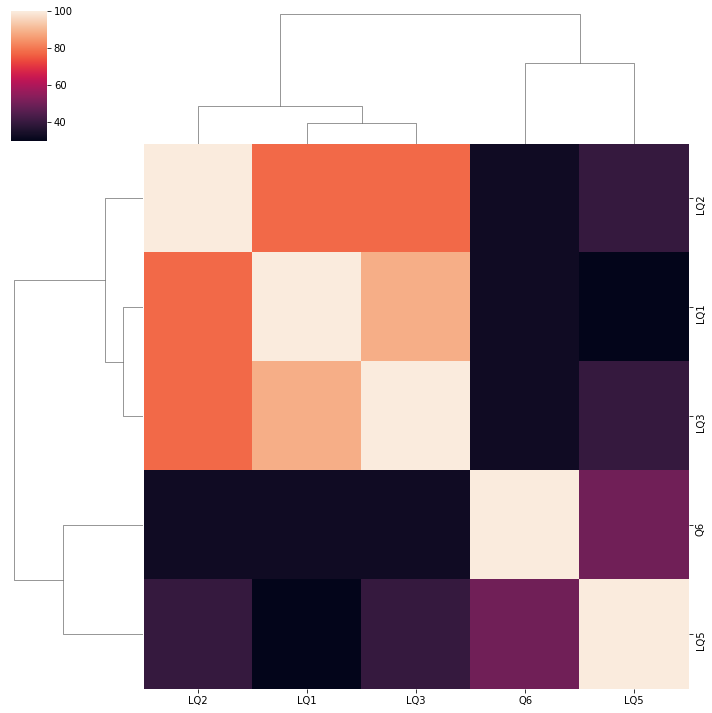

In [61]:
sns.clustermap(small_float)

In [47]:
null_columns=mat.columns[mat.isna().any()]
mat[null_columns].isna().sum()

Series([], dtype: float64)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

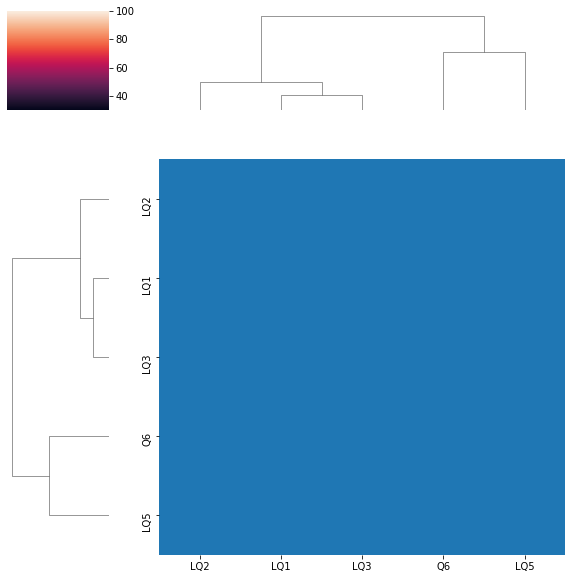

In [50]:
# Plot Hierarchical clustering of raw data
sns.clustermap(small)

In [23]:
pilot = data

rows = pilot.index.to_list()
cols = pilot.index.to_list()
sim_m = pd.DataFrame(index=rows, columns=cols)

j=0
for j in np.arange(len(rows)):
    for i in np.arange(len(rows)):
        Str1 = pilot['Sequence'].loc[rows[j]]
        Str2 = pilot['Sequence'].loc[rows[i]]
        sim_m.iloc[j,i] = similarity(Str1, Str2)[1]
    j=j+1

    
display(sim_m)

,LQ1,LQ2,LQ3,Q6,LQ5,LQ6,LQ7,PX06,TQ51,LQ10,...,RV38,RV39,RV40,RV41,RV42,RV43,RV44,RV45,RV46,RV47
LQ1,100,78,89,35,22,33,44,50,33,12,...,33,33,44,44,33,44,33,33,22,44
LQ2,78,100,78,35,35,50,59,50,33,22,...,56,33,67,44,44,67,67,56,22,44
LQ3,89,78,100,35,33,22,56,50,33,22,...,44,33,56,56,44,44,56,44,22,44
Q6,33,33,33,100,44,33,44,62,86,22,...,38,44,67,44,44,38,38,38,44,44
LQ5,22,35,33,44,100,64,45,25,29,27,...,36,36,45,27,45,36,27,36,33,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RV43,44,67,44,38,36,45,36,62,43,27,...,63,67,62,60,57,100,64,65,40,47
RV44,33,67,56,38,27,55,45,38,43,36,...,58,57,62,70,71,64,100,55,45,47
RV45,33,56,44,38,36,42,36,38,43,32,...,68,60,60,75,60,65,55,100,65,63
RV46,22,22,22,44,33,36,45,38,43,33,...,74,45,65,65,45,40,45,65,100,79


In [82]:
# find unique kmers in dictionary
res = list(sorted({ele for val in kmer_3.values() for ele in val}))
print(res)
# create new dictionary that will store peptides with overlapping kmers
overlap_dict = {}  #create empty dictionary to store overlapping peptides
overlap_keys = res
for i in overlap_keys:
    overlap_dict[i] = []
#print(overlap_dict)
for el in res:
    #print('El:', el)
    for key in kmer_3.keys(): 
        #print('key:', key)
        if el in kmer_3[key]:
            #print('kmer_4[key]:', kmer_3[key])
            #print(el+' in '+ key)
            overlap_dict[el].append(key)
        else:
            print('no overlap')
        #print(overlap_dict)

print(overlap_dict)

['ARA', 'AVG', 'GRQ', 'QAR', 'QRR', 'RAV', 'RQA', 'RQR', 'RRV', 'RVV', 'VGG', 'VVG']
no overlap
no overlap
no overlap
no overlap
no overlap
no overlap
no overlap
no overlap
no overlap
no overlap
{'ARA': ['LQ2'], 'AVG': ['LQ2'], 'GRQ': ['LQ1', 'LQ2'], 'QAR': ['LQ2'], 'QRR': ['LQ1'], 'RAV': ['LQ2'], 'RQA': ['LQ2'], 'RQR': ['LQ1'], 'RRV': ['LQ1'], 'RVV': ['LQ1'], 'VGG': ['LQ1', 'LQ2'], 'VVG': ['LQ1']}


In [66]:
# finding overall kmer stats
from collections import Counter
res = Counter(kmer_4.values())

print(res)
res

TypeError: unhashable type: 'list'

In [ ]:
# create new dictionary that will store peptides with overlapping kmers
overlap_dict = {}  #create empty dictionary to store overlapping peptides

keys = data.index.to_list()

for i in np.arange(len(keys_list)):
        temp_seq = values_list[i]
        #print(temp_seq)
        #print(len(temp_seq))
        n=len(temp_seq)-k+1
        #print(n)
        temp_kmer = []
        for j in np.arange(n): temp_kmer.append(temp_seq[j:j+k])
        kmer_dict[keys_list[i]] = temp_kmer